# **Donwload dos comentários da entrevista do morador de rua usando Python por meio da API de dados do Youtube**

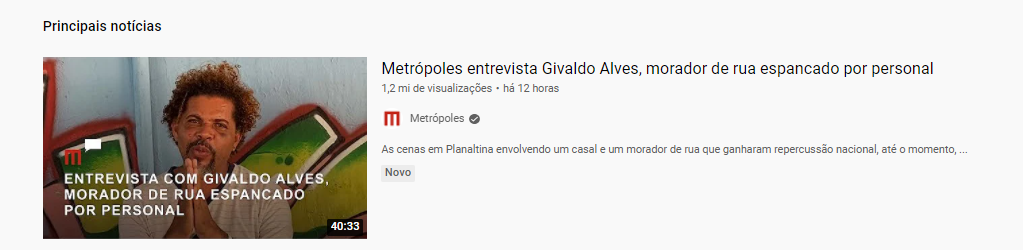

In [2]:

#Assista vídeo do youtube para explicação
# https://youtu.be/B9uCX2s7y7A

api_key = "insira sua chave aqui" 

from apiclient.discovery import build
youtube = build('youtube', 'v3', developerKey=api_key)

import pandas as pd

ID = "yB_NsC5ZcLo" # ID do video no youtube

box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]


def scrape_comments_with_replies():
    data = youtube.commentThreads().list(part='snippet', videoId=ID, maxResults='100', textFormat="plainText").execute()

    for i in data["items"]:

        name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
        comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
        published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
        likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
        replies = i["snippet"]['totalReplyCount']

        box.append([name, comment, published_at, likes, replies])

        totalReplyCount = i["snippet"]['totalReplyCount']

        if totalReplyCount > 0:

            parent = i["snippet"]['topLevelComment']["id"]

            data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()

            for i in data2["items"]:
                name = i["snippet"]["authorDisplayName"]
                comment = i["snippet"]["textDisplay"]
                published_at = i["snippet"]['publishedAt']
                likes = i["snippet"]['likeCount']
                replies = ""

                box.append([name, comment, published_at, likes, replies])

    while ("nextPageToken" in data):

        data = youtube.commentThreads().list(part='snippet', videoId=ID, pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()

        for i in data["items"]:
            name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
            comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
            published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
            likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
            replies = i["snippet"]['totalReplyCount']

            box.append([name, comment, published_at, likes, replies])

            totalReplyCount = i["snippet"]['totalReplyCount']

            if totalReplyCount > 0:

                parent = i["snippet"]['topLevelComment']["id"]

                data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                textFormat="plainText").execute()

                for i in data2["items"]:
                    name = i["snippet"]["authorDisplayName"]
                    comment = i["snippet"]["textDisplay"]
                    published_at = i["snippet"]['publishedAt']
                    likes = i["snippet"]['likeCount']
                    replies = ''

                    box.append([name, comment, published_at, likes, replies])

    df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})

    df.to_csv('youtube-comments.csv', index=False, header=False)

    return "Successful! Check the CSV file that you have just created."


scrape_comments_with_replies()

'Successful! Check the CSV file that you have just created.'

In [6]:
df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})
df.head(20)

,Name,Comment,Time,Likes,Reply Count
0,Name,Comment,Time,Likes,Reply Count
1,Metrópoles,ASSISTA TAMBÉM: Leo Dias entrevista Eduardo Al...,2022-03-24T15:23:51Z,16,6
2,Luiza Neves,"*Que o desempregado consiga um emprego, que o ...",2022-03-24T15:31:08Z,0,
3,Luiza Neves,"*Que o desempregado consiga um emprego, que o ...",2022-03-24T15:31:04Z,0,
4,Luiza Neves,"*Que o desempregado consiga um emprego, que o ...",2022-03-24T15:30:58Z,0,
5,Luiza Neves,"*Que o desempregado consiga um emprego, que o ...",2022-03-24T15:30:54Z,0,
6,Maycon Duanees,Olha a galera colocando gasolina onde não deve...,2022-03-24T15:29:52Z,0,
7,Lá Família Alpha,https://youtu.be/jzaBumCGVO0,2022-03-24T15:24:18Z,0,
8,ivany santos,ACREDITO TOTALMENTE NA VERSÃO DELE. INFELIZME...,2022-03-24T15:34:52Z,0,0
9,Rodrigo Gomes,#FechamentocomBolsonaro2022,2022-03-24T15:34:49Z,0,0


In [8]:
df.shape

(15148, 5)

In [14]:
#exportando para CSV
from google.colab import files
df.to_csv('df.csv') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
df['Comment'][60]

'Gente ele pediu 1 minuto de silêncio pelo mundo . 👏👏'